In [1]:
import pandas as pd
import seaborn as sns

In [6]:
data = pd.read_csv('../data/model_data_updated.csv')

data.sample(5)

,port_name,Recipient,region,latitude,longitude,anchor_depth_m,cargo_depth_m,potential_chinese_naval_use,distance_to_nearest_population_center_km,received_chinese_investment,Total chinese debt,GDP in 2021
8,Doraleh Multipurpose Port and Damerjog Livesto...,Djibouti,Africa,11.596910,43.069199,0.0,0.0,0,8.316440,1,2.854667e+09,3.385825e+09
33,Nouadhibou Fishing Port,Mauritania,Africa,20.899400,-17.053700,9.8,17.8,1,4.964551,1,2.588980e+09,9.222536e+09
16,Pointe-Noire Mineral Port,"Congo, Rep.",Africa,-4.797537,11.850330,15.1,15.1,1,2.786753,1,2.792100e+07,1.482569e+10
13,Lomé Container Terminal,Togo,Africa,6.137487,1.275443,14.8,10.0,1,6.044239,1,1.587294e+09,8.342244e+09
0,Alto do Bandim Fishing Port,Guinea-Bissau,Africa,11.839010,-15.588719,5.5,8.5,0,2.886605,1,3.208335e+08,1.724556e+09


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   port_name                                 34 non-null     object 
 1   Recipient                                 34 non-null     object 
 2   region                                    34 non-null     object 
 3   latitude                                  34 non-null     float64
 4   longitude                                 34 non-null     float64
 5   anchor_depth_m                            34 non-null     float64
 6   cargo_depth_m                             34 non-null     float64
 7   potential_chinese_naval_use               34 non-null     int64  
 8   distance_to_nearest_population_center_km  34 non-null     float64
 9   received_chinese_investment               34 non-null     int64  
 10  Total chinese debt                      

<Axes: >

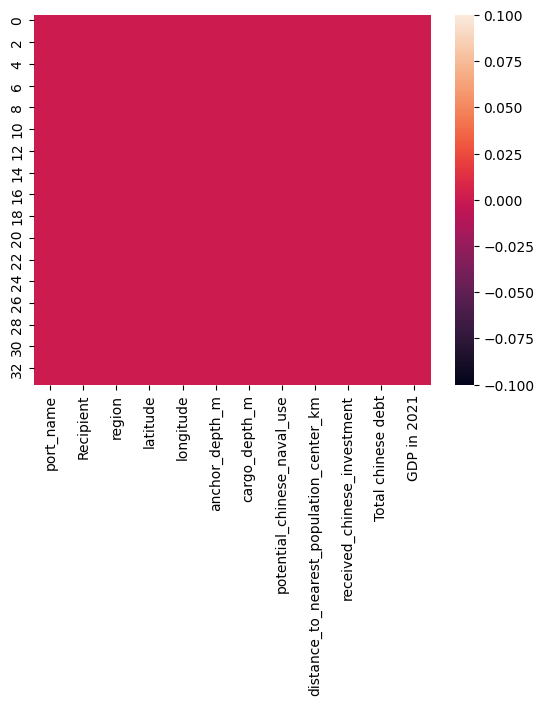

In [4]:
"""
This is an exceptionally small dataset and should be treated as proof-of-concept. To engineer this datset at the 
level it needs would turn this into a months-long project. 

BLUF: It's a good start but needs work.
"""

# Making sure there's no NaNs
sns.heatmap(data.isnull())

In [9]:
# Now we get rid of the columns we don't need

data_cleaned = data.drop(["port_name", "Recipient", "region", "latitude", "longitude", "received_chinese_investment"], axis=1)

data_cleaned.sample(5)

,anchor_depth_m,cargo_depth_m,potential_chinese_naval_use,distance_to_nearest_population_center_km,Total chinese debt,GDP in 2021
0,5.5,8.5,0,2.886605,3.208335e+08,1.724556e+09
24,9.4,6.0,0,7.437036,8.960255e+09,1.616806e+10
32,25.1,9.1,1,2.382084,1.790960e+10,3.422951e+10
4,0.0,0.0,0,2.034233,6.957235e+09,7.279464e+10
23,3.4,3.4,0,0.866748,5.820564e+08,1.296089e+09


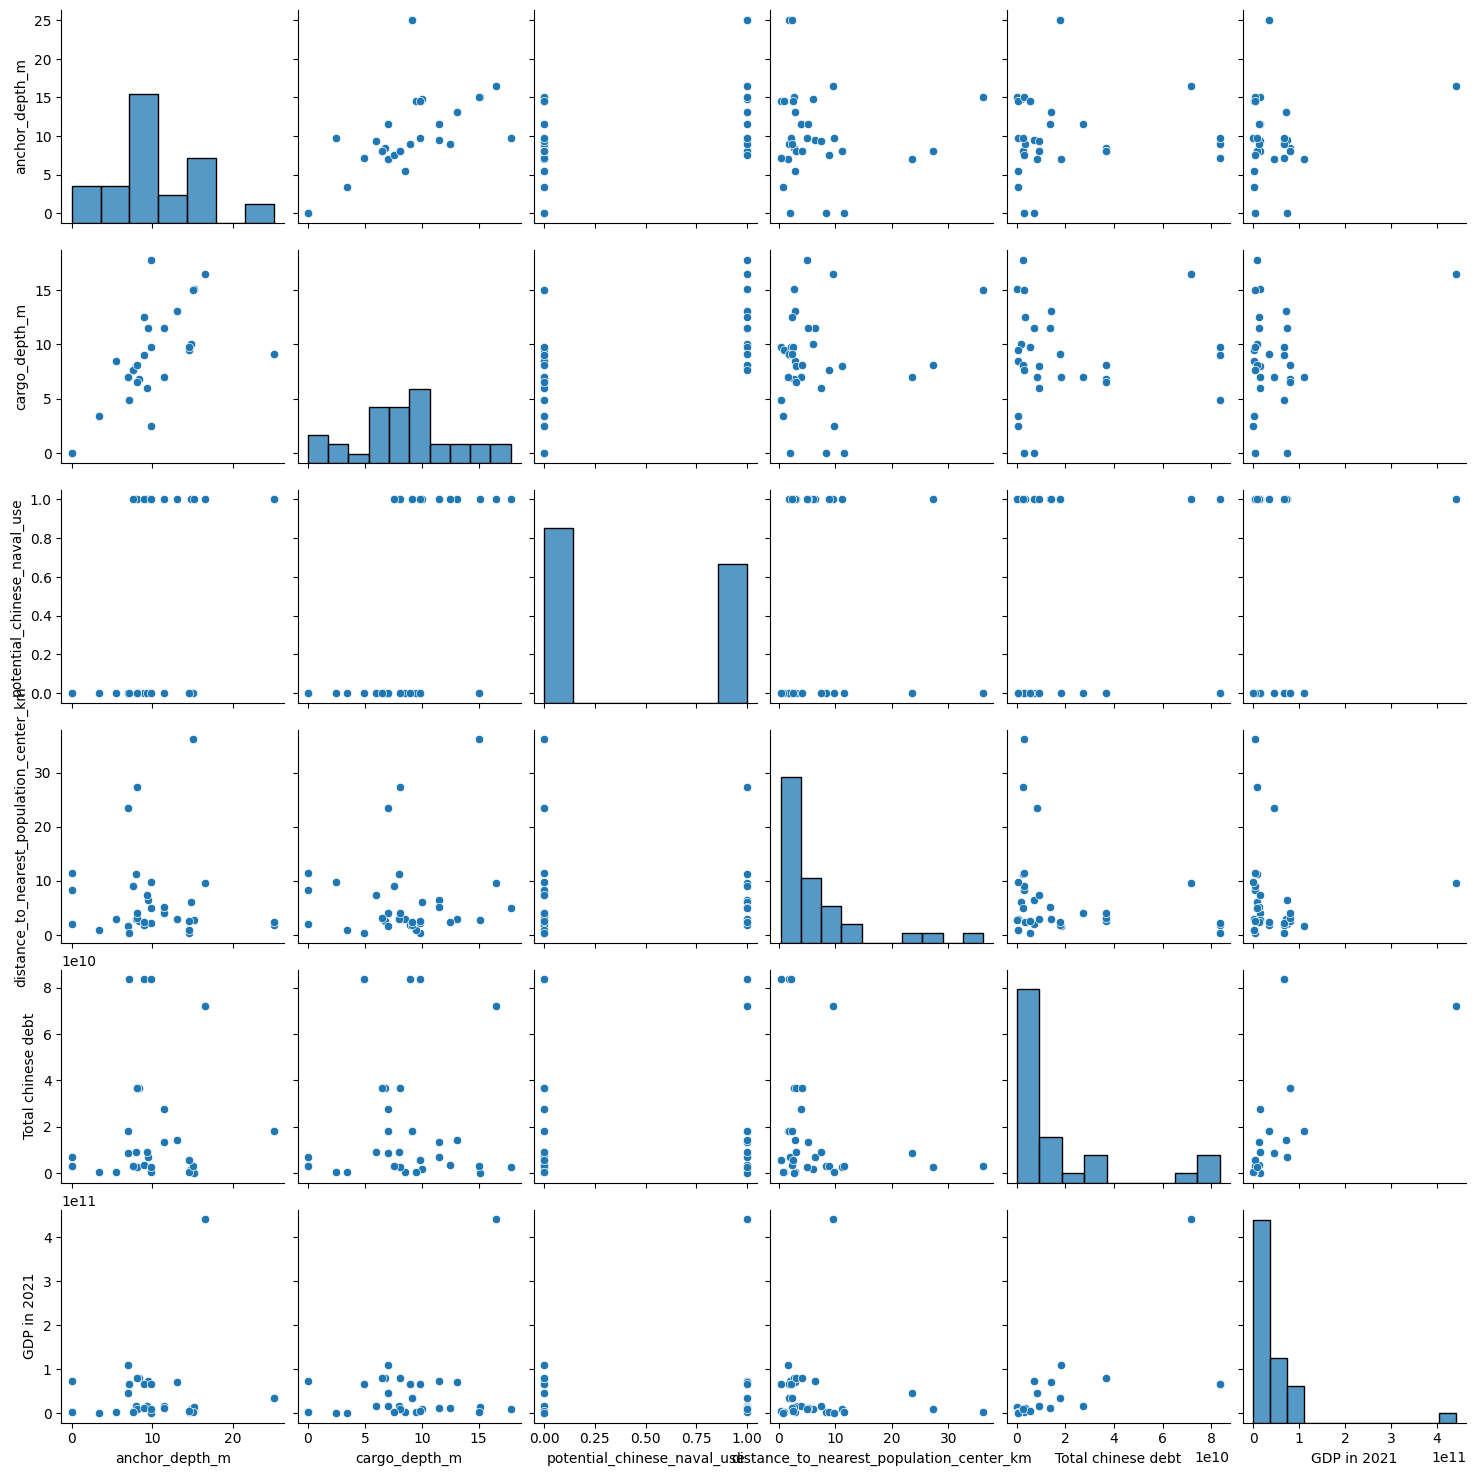

In [10]:
sns.pairplot(data_cleaned)

In [11]:
# Yeah I know. It's a terrible size lol
# Okay now we split our (tiny) dataset up into variables

y = data_cleaned['potential_chinese_naval_use']

# We keep everything except what are using for y.
X = data_cleaned.drop(['potential_chinese_naval_use'], axis=1)

In [12]:
# We have a HUGE disparity between meters of depth, and billions of dollars in GDP. We need to normalize these values.

from sklearn.preprocessing import StandardScaler

# Crate the scaler which we'll export later.
scaler = StandardScaler()

# Fit the scaler to the data and transform it.
X_scaled = scaler.fit_transform(X)

In [13]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

# 42 = the answer to life, the universe, and everything.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=42)

In [14]:
# We want a binary output, so we'll use a Logistic Regression model.
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
lr = LogisticRegression()

# Train the model.
lr.fit(X_train, y_train)

# Predict the target variable based on the test data.
y_pred = lr.predict(X_test)

In [15]:
y_pred

array([0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [16]:
y_test

15    1
19    0
27    0
26    0
8     0
24    0
21    0
Name: potential_chinese_naval_use, dtype: int64

In [17]:
# Evaluation of the model. This is going to be bad. Dataset too small.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.57


In [18]:
# Yikes.

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         1

    accuracy                           0.57         7
   macro avg       0.40      0.33      0.36         7
weighted avg       0.69      0.57      0.62         7



In [ ]:
# I work for the government. This works for me. Onward.